# Analysis of Umbrella Sampling Simulations
potentialof mean force for a sodium - chloride ion pair in water as a function of its separation is shown below:

![img](nacl_pmd.png)

Ref: [Baumketner, J Chem Phys. 2009 Mar 14; 130(10): 104106.](https://doi.org/10.1063%2F1.3081138) 

The lowest energy state is when the ions are in contact. As the distance increases the energy rises quickly to a maximum, then drops back, as the situation is reached where a first solvation shell of water can be formed between them. A second local maximum, and then minimum, can also be seen, corresponding to the formation of a complete second solvation shell. The Na-Cl ion pair therefore serves as a very simple but relevant proxy for many more complex biological systems - e.g. protein-ligand complexes - where a bound state is separated from the unbound state by a significant enertgy barrier, and a number of metastable states may also exist along the unbinding pathway.

Before we get going, it's important to remember that the potential of mean force, as shown here, is not the same as the distance-dependence of the free energy. The PMF does not take into account that as the distance between the ions increases, the number of possible states with the same ion-ion separation increases (they form the surface of a sphere of increasing surface area). To convert a free energy plot to a PMF, we must make this volume correction (a factor of (4/3)\*pi\*r^3).

## Analysis of data from "vanilla" MD simulations
First let's convince ourselves that some form of enhanced sampling is neccessary for this system. In the `/results` folder are data files from two 200ps "vanilla" MD simulations of the NaCl system, one of which was begun from a configuration where the ions were separated by just 2.6 Angstroms, and the other from a configuration where the separation was 4.5 Angstroms - i.e., either side of a major barrier.

The code cells below show how yopu can extract the Na - Cl distances in these files, then use `numpy` and `matplotlib` to transform the data into free energy plots and PMFs. Do either or both simulations yield converged samplings that generate PMF plots close to those in the literature?

In [15]:
!ls /home/jovyan/shared/jupyter_notebooks

ESMFold.ipynb		       example_string_workshop.py
example_string_workshop.ipynb  omegafold.ipynb


In [1]:
# Import the required packages:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [16]:
# Start with the data from the simulation begun from the contacting ion pair:
with open('nacl_2.6_md1.dist') as f:
    data = f.readlines()

# The file has two columns of data: the snapshot number, and the Na-Cl separation (in Angstroms).
# There is also a header row to skip.
distances = [float(l.split()[1]) for l in data[1:]]

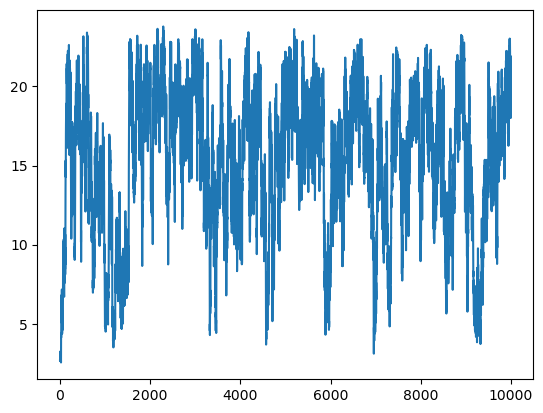

In [17]:
# Look at how the Na-Cl separation varies over time:
plt.plot(np.array(distances))

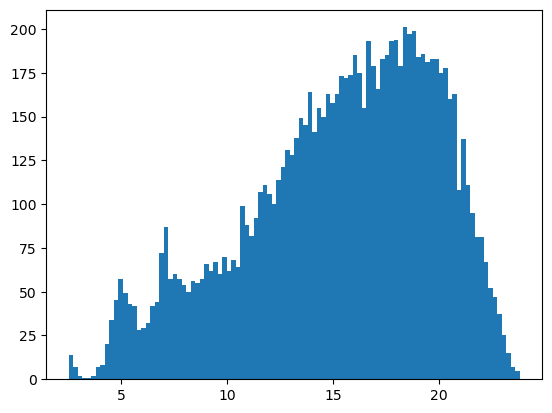

In [18]:
out = plt.hist(distances, bins=100)

In [19]:
bins = out[0]
edges = out[1]
centres = (edges[:100] + edges[1:]) / 2
vols = [np.pi*(edges[i+1]**3 - edges[i]**3)*4/3 for i in range(100)]

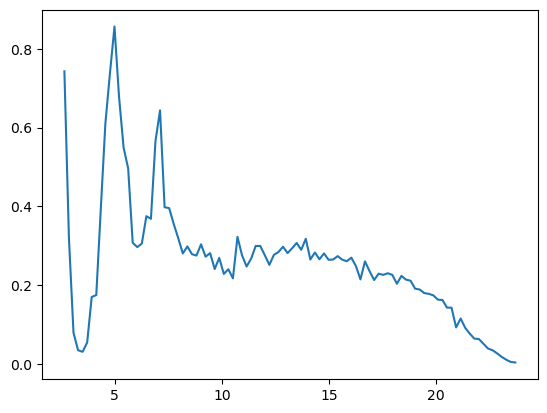

In [20]:
plt.plot(centres, bins/vols)

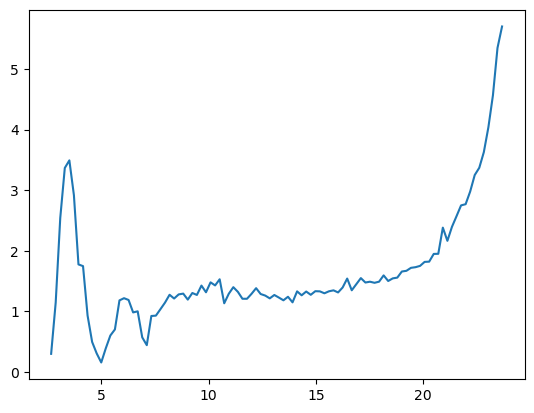

In [21]:
plt.plot(centres, -np.log(bins/vols))

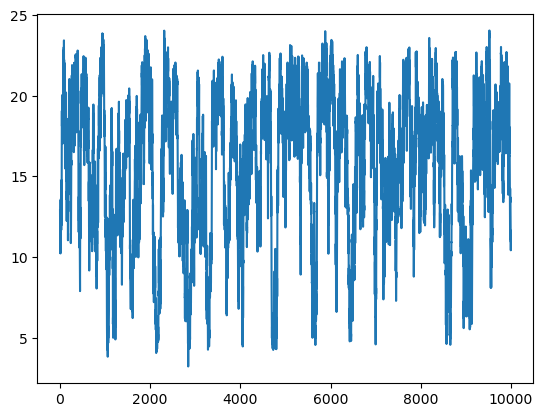

In [23]:
# Start with the data from the simulation begun from the contacting ion pair:
with open('nacl_md1.dist') as f:
    data = f.readlines()

# The file has two columns of data: the snapshot number, and the Na-Cl separation (in Angstroms).
# There is also a header row to skip.
distances = [float(l.split()[1]) for l in data[1:]]
plt.plot(np.array(distances))

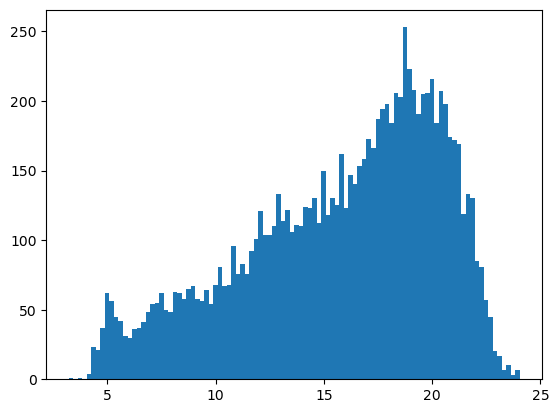

In [24]:
out = plt.hist(distances, bins=100)

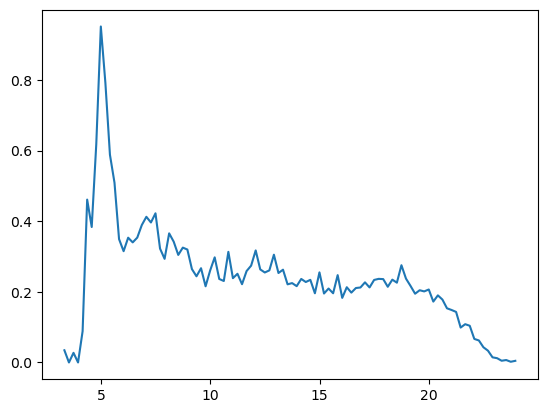

In [25]:
bins = out[0]
edges = out[1]
centres = (edges[:100] + edges[1:]) / 2
vols = [np.pi*(edges[i+1]**3 - edges[i]**3)*4/3 for i in range(100)]
plt.plot(centres, bins/vols)

In [9]:
data = np.loadtxt('freefile')

In [10]:
print(data.shape)

(100, 5)


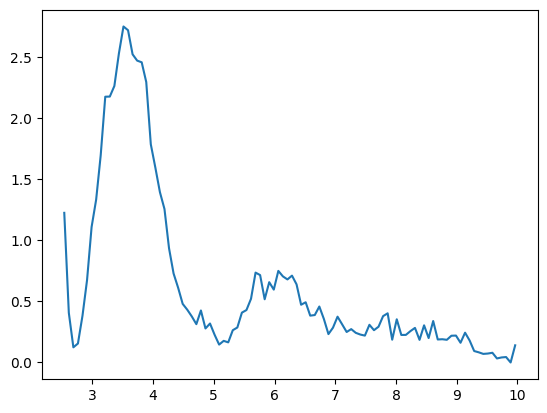

In [11]:
plt.plot(data[:, 0], data[:, 1])

In [16]:
gfac = [np.pi * r**3 * 4 / 3 for r in data[:, 0]]

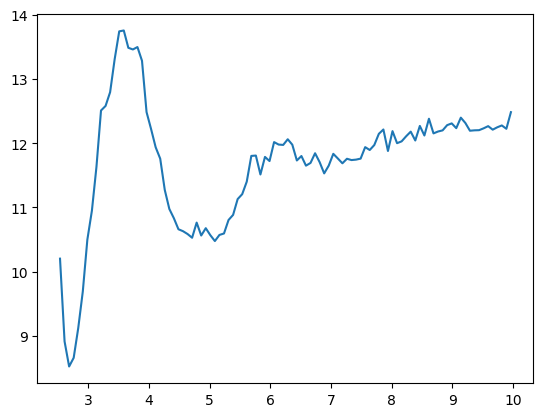

In [21]:
plt.plot(data[:, 0], -np.log(data[:, 3] / gfac))